# Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
sns.set_style()

# Loading the dataset

In [2]:
curr = pd.read_csv("../data/curriculum.csv")

# Analysis of the structure of the dataset

## First few entries

In [3]:
curr

,Courses,Topic,Duration,Effort,Total Hours Lower Bound,Start Date,End Date Estimate Lower Bound,Total Hours Upper Bound,Start Date.1,End Date Estimate Upper Bound,Actual End Date,Prerequisites
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,100,2022-07-28,2022-09-01,100,2022-07-28,2022-09-01,NaN,-
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,135,2022-09-01,2022-10-18,135,2022-09-01,2022-10-18,NaN,high school algebra
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,56,2022-10-18,2022-11-06,70,2022-10-18,2022-11-11,NaN,-
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,48,2022-11-06,2022-11-23,60,2022-11-11,2022-12-02,NaN,How to Code: Simple Data
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,20,2022-11-23,2022-11-30,40,2022-12-02,2022-12-16,NaN,How to Code (Hear instructor)
5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,12,2022-11-30,2022-12-04,24,2022-12-16,2022-12-25,NaN,"Programming Languages, Part A"
6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,12,2022-12-04,2022-12-09,24,2022-12-25,2023-01-02,NaN,"Programming Languages, Part B"
7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,16,2022-12-09,2022-12-14,16,2023-01-02,2023-01-08,NaN,Basic Java
8,Design Patterns,Core Programming,4 weeks,4 hours/week,16,2022-12-14,2022-12-20,16,2023-01-08,2023-01-13,NaN,Object-Oriented Design
9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,8,2022-12-20,2022-12-23,20,2023-01-13,2023-01-20,NaN,Design Patterns


In [4]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Courses                        43 non-null     object 
 1   Topic                          43 non-null     object 
 2   Duration                       42 non-null     object 
 3   Effort                         42 non-null     object 
 4   Total Hours Lower Bound        43 non-null     int64  
 5   Start Date                     43 non-null     object 
 6   End Date Estimate Lower Bound  43 non-null     object 
 7   Total Hours Upper Bound        43 non-null     int64  
 8   Start Date.1                   43 non-null     object 
 9   End Date Estimate Upper Bound  43 non-null     object 
 10  Actual End Date                0 non-null      float64
 11  Prerequisites                  42 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.2

## Column Data Types Distribution

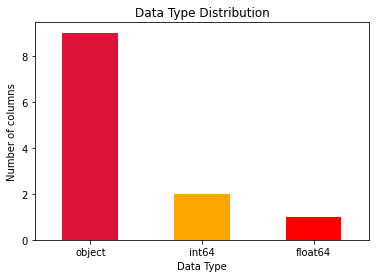

In [5]:
pd.Series(curr.dtypes).value_counts().plot(kind="bar",
                                           title="Data Type Distribution",
                                           xlabel="Data Type",
                                           ylabel="Number of columns",
                                           color=["crimson","orange","red"],
                                           rot=0)
plt.show()

Most of the data is in the form of text resembling courses and timelines. The integer columns depict time-series data for course completion, effort, and their upper and lower bounds.

# Missing Value Analysis

## Converting other representations to null

In [6]:
curr = curr.replace({"-" : None})

## Checking the null values with threshold

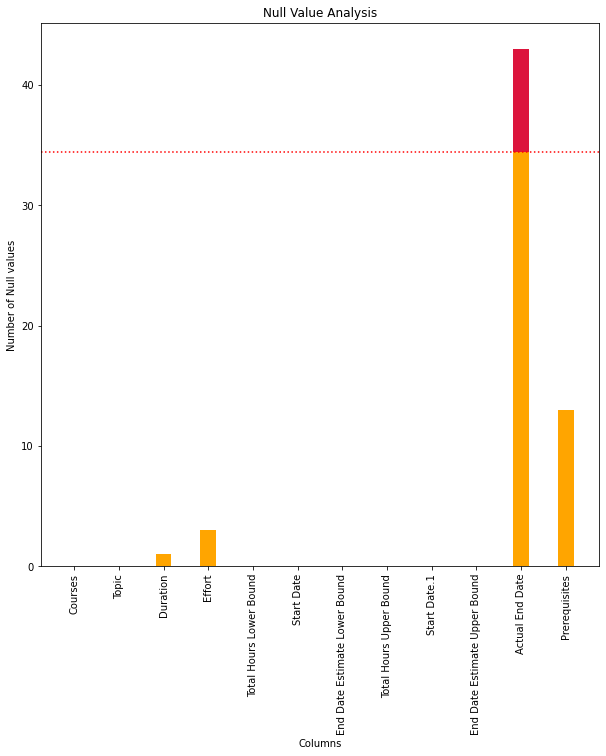

In [7]:
threshold = 0.8*len(curr)
values = curr.isna().sum()
x = range(len(curr.columns))
a_threshold = np.maximum(values - threshold, 0)
b_threshold = np.minimum(values, threshold)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.bar(x, b_threshold, 0.35, color="orange")
ax.bar(x, a_threshold, 0.35, color="crimson", bottom=b_threshold)

plt.axhline(threshold, color='red', ls='dotted')
plt.xticks(x,values.index,rotation="vertical")
plt.title("Null Value Analysis")
plt.xlabel("Columns")
plt.ylabel("Number of Null values")
plt.show()

We shall drop the whole column named "Actual End Date" because it has 100% null values and no imputation might help.

In [8]:
curr = curr.drop(["Actual End Date"],axis=1)

# Courses across various topics

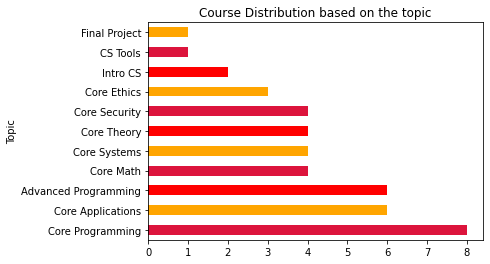

In [9]:
curr["Topic"].value_counts().plot(kind="barh",
                                  title="Course Distribution based on the topic",
                                  xlabel="Topic",
                                  ylabel="Number of Courses",
                                  rot=0,
                                  color=["crimson","orange","red"])
plt.show()

# Duration, Effort, Lower Bound, Upper Bound Comparision and Correlation

In [10]:
def get_time(t : str):
    a = 0
    if t == "-":
        return 0
    try:
        a = re.sub("[a-zA-Z]","",t).replace("/","")
        if "-" in a:
            b = list(map(int,a.split("-")))
            a = sum(b)/len(b)
    except TypeError:
        print("Null",t,a)
    return int(a)

In [11]:
curr["Duration"] = curr["Duration"].map(get_time)

Null nan 0


In [12]:
curr["Effort"] = curr["Effort"].map(get_time)

Null None 0
Null None 0
Null nan 0


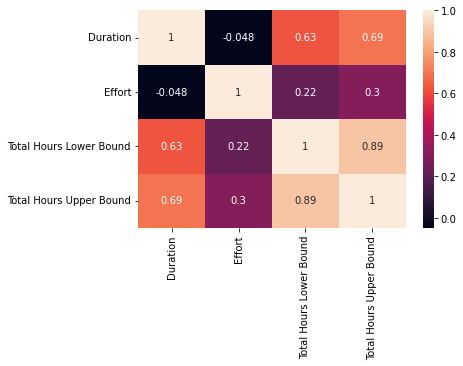

In [13]:
sns.heatmap(curr.corr(),annot=True)
plt.show()

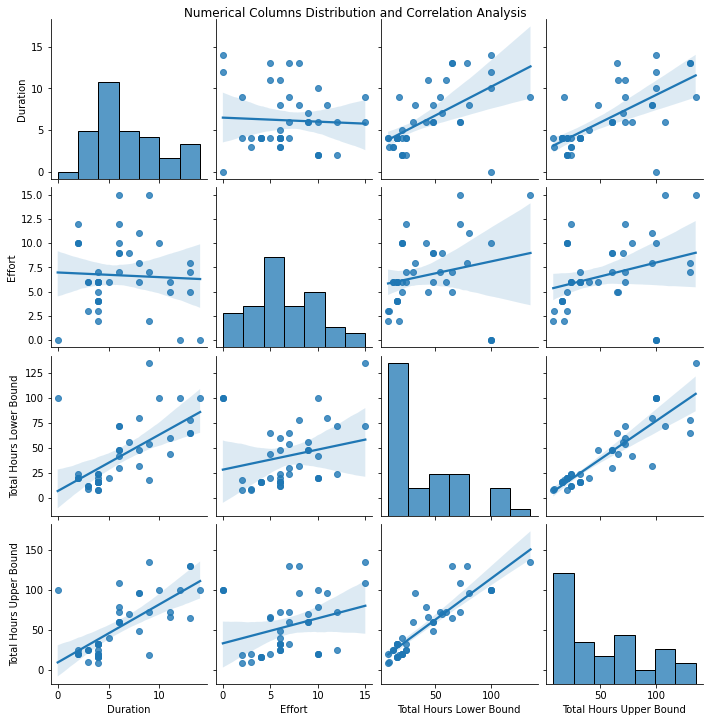

In [14]:
figure = sns.pairplot(curr,kind="reg")
figure.fig.suptitle("Numerical Columns Distribution and Correlation Analysis", y=1)
plt.show()

# Duration Clustering

In [41]:
curr["label"] = DBSCAN(eps=3, min_samples=2).fit_predict(curr[["Duration","Effort","Total Hours Upper Bound","Total Hours Lower Bound"]])

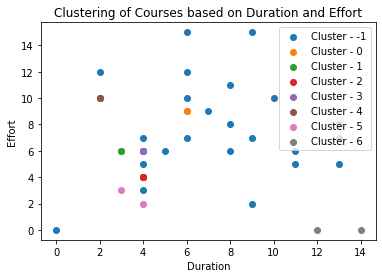

In [42]:
#Getting unique labels
 
u_labels = np.unique(curr["label"])
df = curr[["Courses","Effort","Duration","label"]] 
    
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[df.label == i]["Duration"] , df[df.label == i]["Effort"] , label = "Cluster - "+str(i))
plt.legend()
plt.title("Clustering of Courses based on Duration and Effort")
plt.xlabel("Duration")
plt.ylabel("Effort")
plt.show()

In [43]:
df.sort_values(by="label")

,Courses,Effort,Duration,label
0,Python for Everybody,10,10,-1
40,Software Debugging,6,8,-1
37,Compilers,7,9,-1
36,Parallel Programming,7,4,-1
33,"Ethics, Technology and Engineering",2,9,-1
31,Computer Graphics,12,6,-1
30,Machine Learning,5,11,-1
26,Identifying Security Vulnerabilities in C/C++ ...,5,4,-1
23,Cybersecurity Fundamentals,11,8,-1
41,Software Testing,6,4,-1
